Resolvendo um problema de regressão
===================
## Dados do Curso
**Instituição:** IFES

**Curso:** Mestrado Profissional Computação Aplicada

**Professor:** Francisco de Assis Boldt

**Aluno:** Arthur Chisté Lucas

## Ambiente
**IDE:** MS Visual Studio Code

**Versão Python:** 3.8.3 64bits com anaconda 2020.07

## Introdução

Nesta tarefa, será utilizado um dataset contendo preços de casas, obtido no site Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Conforme abaixo, o dataset precisa ser baixado e armazenado no diretório **data/house_prices_dataset**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

url = 'https://github.com/arthurclucas/ReconhecimentoPadroes/blob/main/data/house_prices_dataset/train.csv?raw=true'
dados = pd.read_csv(url)
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Removendo colunas com poucos dados preenchidos e preenchendo as demais com N/A e outras colunas que não serão utilizadas para esse exercício após breve análise exploratória.

In [44]:
dados = dados[['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
dados.fillna(dados.mean(), inplace=True)
dados.fillna('N/A', inplace=True)
dados.columns[dados.isna().any()].tolist()
dados = dados.select_dtypes(include=np.number)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   BsmtFinSF1    1460 non-null   int64
 4   BsmtFinSF2    1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   2ndFlrSF      1460 non-null   int64
 8   LowQualFinSF  1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  GarageArea    1460 non-null   int64
 11  WoodDeckSF    1460 non-null   int64
 12  OpenPorchSF   1460 non-null   int64
 13  SalePrice     1460 non-null   int64
dtypes: int64(14)
memory usage: 159.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B6C844DC0>,
      dtype=object)

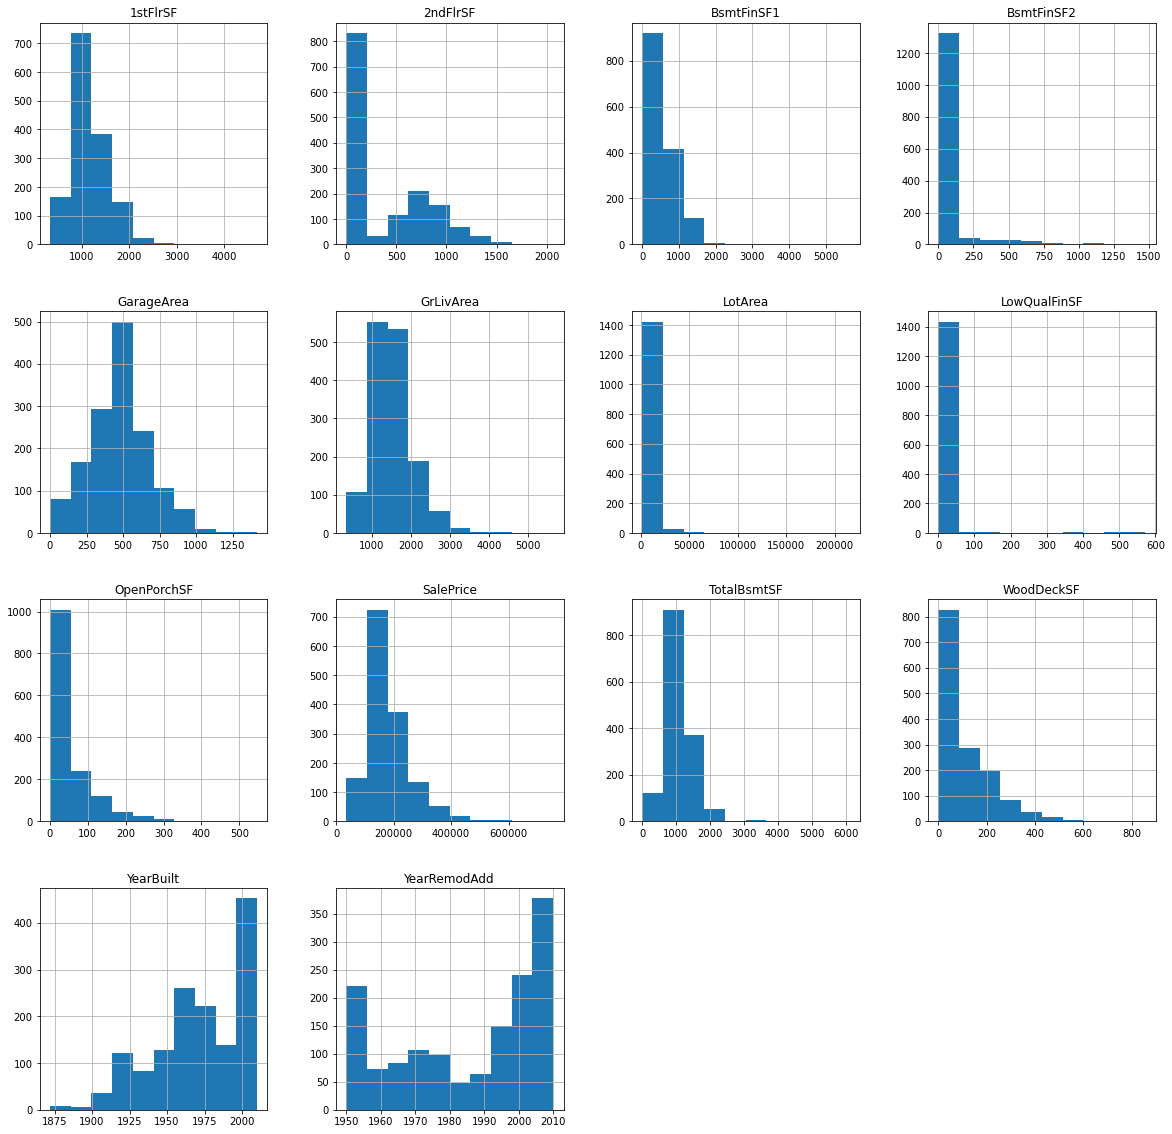

In [45]:
fig = plt.figure(figsize = (20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
dados.hist(ax = ax)

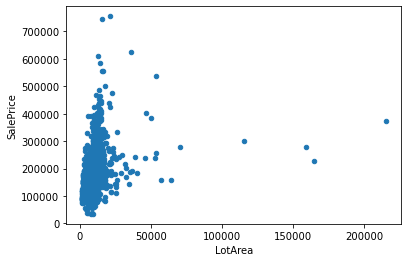

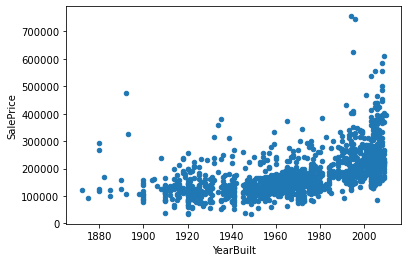

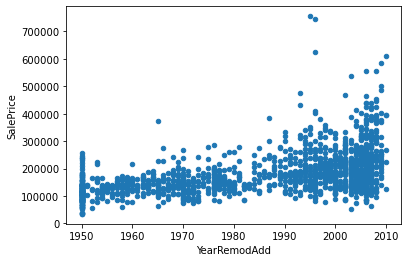

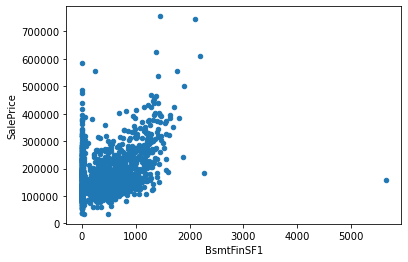

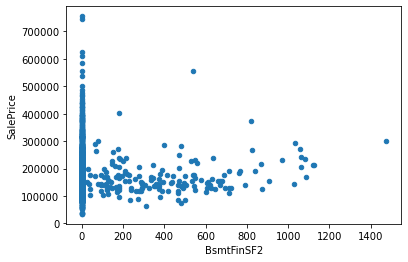

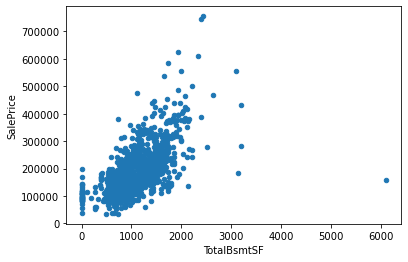

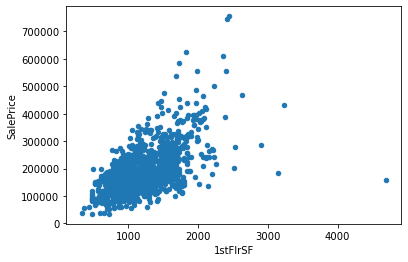

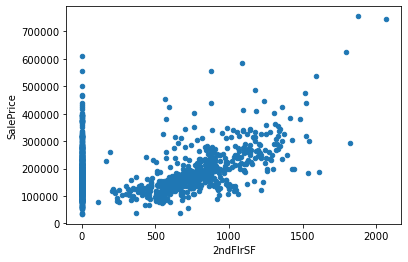

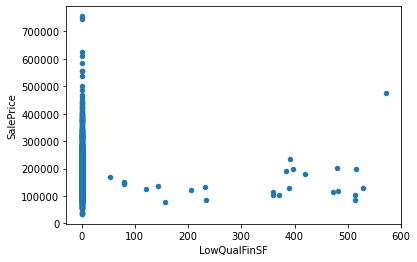

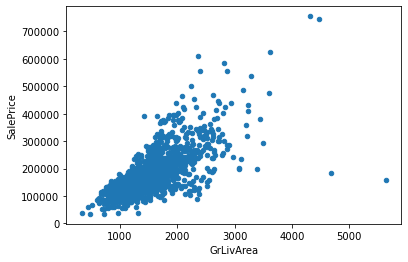

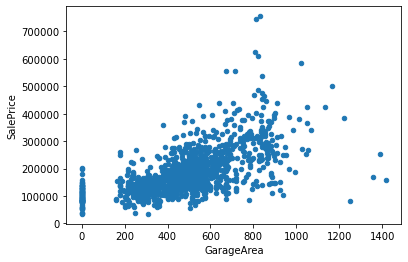

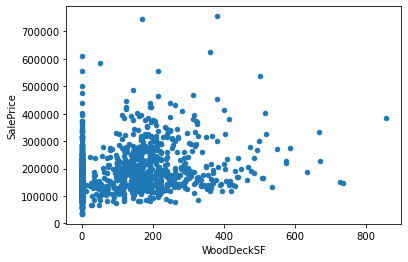

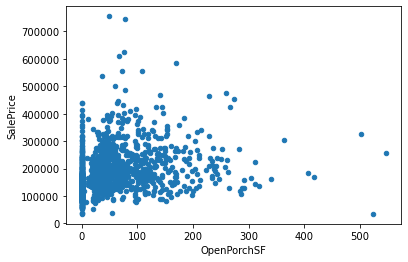

In [46]:

#dados = dados[['GrLivArea', 'SalePrice']]

for i in range(len(dados.columns) -1):
    dados.plot.scatter(x=i, y='SalePrice')

Treina a base e colhe os resultados

In [47]:
y = dados['SalePrice']
X = dados.drop('SalePrice', axis = 1)

modelo = LinearRegression()
modelo.fit(X, y)
yPred = modelo.predict(X)
erro = mean_squared_error(y, yPred)
print(f"erro: {erro}")
print(f"intercept_: {modelo.intercept_}")
print(f"coef_: {modelo.coef_}")
print(f"ypred: {yPred}")

erro: 1657756395.789723
intercept_: -2029319.208442636
coef_: [ 3.78041735e-01  4.58446085e+02  5.71251949e+02  1.40963221e+01
 -3.18799322e+00  2.74742801e+01  2.72462693e+01  2.58480117e+01
 -1.15609015e+01  4.15333795e+01  5.60067286e+01  3.05670480e+01
  1.36486018e+01]
ypred: [217773.73420769 179124.04545068 224312.82452107 ... 219667.36328367
 134344.14494308 168347.70372836]


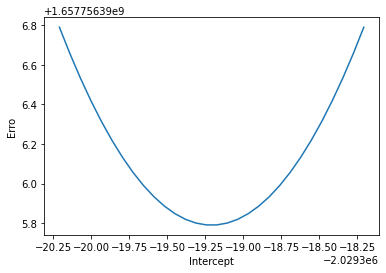

In [48]:
def plotError(modelo, delta):
    erros = []
    intercepts = np.linspace(modelo.intercept_-delta, modelo.intercept_+delta, 30)
    intercept_ = modelo.intercept_
    for i in intercepts:
        modelo.intercept_ = i
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_ = intercept_
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept")
    plt.plot(intercepts, erros)
    plt.show()

plotError(modelo, 1)